In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import gadget_reader as gd
path = '/home/omarioni/Model_D1/'
sim = gd.Open(path+'snap_010', gadget_type=1, verbose=False)

pdrk = sim.Read('POS ', 1)
pstr = sim.Read('POS ', 2)

mdrk = sim.Read('MASS', 1)
mstr = sim.Read('MASS', 2)

vel  = sim.Read('VEL ', 2)

In [3]:
sim.Property

['HEAD', 'POS ', 'VEL ', 'ID  ', 'MASS', 'U   ']

In [16]:
import bines2
import density as den
import circular_velocity as vcirc


G = 4.299e-6

xstr = pstr[0,:]
ystr = pstr[1,:]
zstr = pstr[2,:]
r = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    
vx = vel[0,:] 
vy = vel[1,:] 
vz = vel[2,:] 

Mtot = sum(mdrk)+sum(mstr)
# print Mtot

r200 = G*Mtot*1e10/200.**2

# print r200
rgal=0.15*r200

#----------calculamos las dispersiones de velocidades---------------------
corte1, = np.where(r < rgal)
#     corte_bin2, = np.where(rn < 6.)

R = np.sqrt(xstr[corte1]**2 + ystr[corte1]**2)

nbin = 20 #20
rbin, nodos = bines2.rbin1(R, nbin)

Vr = (xstr[corte1]*vx[corte1] + ystr[corte1]*vy[corte1])/R
Vz = vz[corte1]
Vt = (xstr[corte1]*vy[corte1] - ystr[corte1]*vx[corte1])/R


sigma_z = np.zeros(nbin)
sigma_R = np.zeros(nbin)
sigma_t = np.zeros(nbin)


for j in range(nbin):
    mask, = np.where((nodos[j] < R) & (nodos[j+1] > R))
    n = len(mask)
    Vz_mean = np.mean(Vz[mask])
    Vr_mean = np.mean(Vr[mask])
    Vt_mean = np.mean(Vt[mask])

    sigma_z[j] = np.sqrt(sum((Vz[mask] - Vz_mean)**2)/n)
    sigma_R[j] = np.sqrt(sum((Vr[mask] - Vr_mean)**2)/n)
    sigma_t[j] = np.sqrt(sum((Vt[mask] - Vt_mean)**2)/n)


surf_den, rden = den.surf_density(R,mstr[corte1]*1e10,nbin)

xdrk = pdrk[:,0]
ydrk = pdrk[:,1]
zdrk = pdrk[:,2]
rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)

corte_drk = np.where(rdrk < rgal)

Rdrk = np.sqrt(xdrk[corte_drk]**2 + ydrk[corte_drk]**2)

Rtot= concatenate([R, Rdrk])
mtot= concatenate([mstr[corte1], mdrk[corte_drk]])

vc, r_vc = vcirc.Vc_bin(Rtot, mtot*1e10, nbin)

data = np.ndarray([nbin,6])
data[:,0] = rbin
data[:,1] = sigma_z
data[:,2] = sigma_R
data[:,3] = sigma_t
data[:,4] = surf_den
data[:,5] = vc



np.savetxt('../_data/Q_test.dat',data, fmt='%12.6f')

In [17]:
path = '/home/omarioni/'
data = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/Q_test.dat')
rbin   = data[:,0]
sigmaz = data[:,1]
sigmaR = data[:,2]
surden = data[:,4]
Vcirc  = data[:,5]

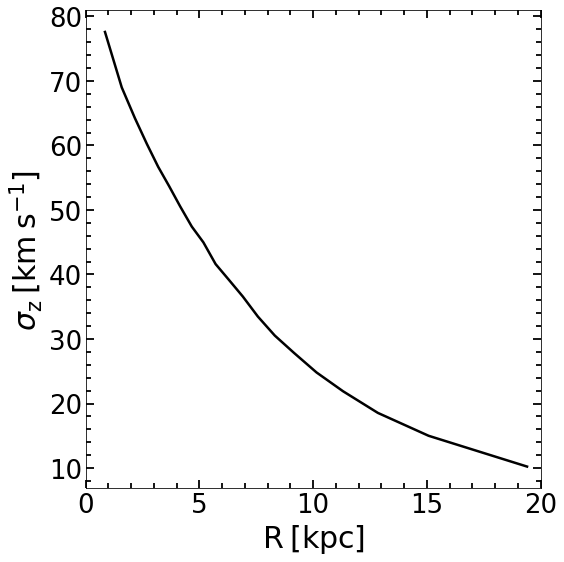

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

ax.plot(rbin, sigmaz,'k', lw=2.5)

ax.set_ylabel(r'$\sigma_{\mathrm{z}} \: \mathrm{[km\:s^{-1}]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{R\:[kpc]}$',fontsize=30)

# ax.set_ylim(0,0.7)
ax.set_xlim(0,20)

ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='true',top='true')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='true',top='true')
ax.legend(fontsize=21,frameon=False, loc=1)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sigma_R.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

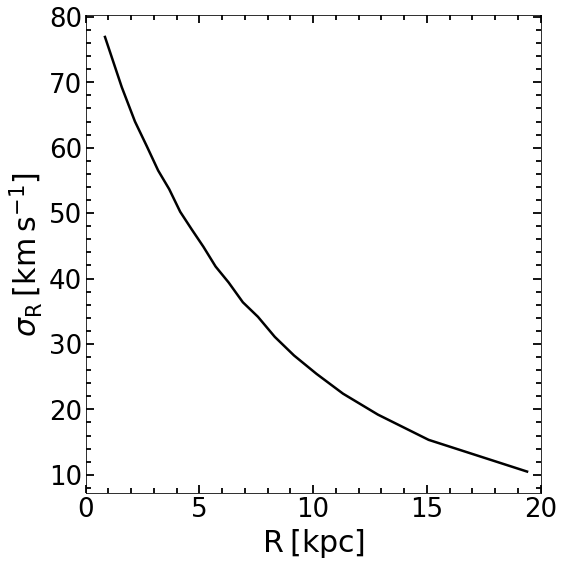

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

ax.plot(rbin, sigmaR,'-', lw=2.5, color='k')

# ax.set_yscale('log')
ax.set_ylabel(r'$\sigma_{\mathrm{R}} \: \mathrm{[km\:s^{-1}]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{R\:[kpc]}$',fontsize=30)
# ax.set_xticks([0,1,2,3,4,5])
ax.set_xlim(0,20)
# ax.set_ylim(0,0.7)

ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='true',top='true')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='true',top='true')
ax.legend(fontsize=21,frameon=False, loc=1)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sigma_R.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

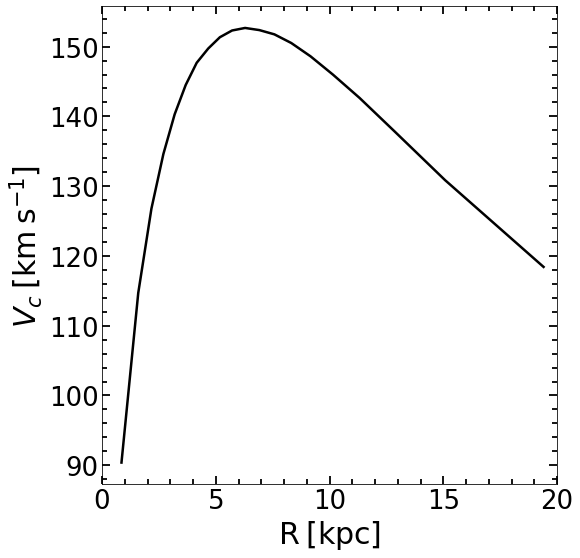

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

ax.plot(rbin, Vcirc,'-', lw=2.5, color='k')


ax.set_ylabel(r'$V_c \: \mathrm{[km\:s^{-1}]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{R\:[kpc]}$',fontsize=30)
# ax.set_xticks([0,1,2,3,4,5])
ax.set_xlim(0,20)
# ax.set_ylim(0,0.7)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='true',top='true')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='true',top='true')
ax.legend(fontsize=21,frameon=False, loc=1)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sigma_R.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

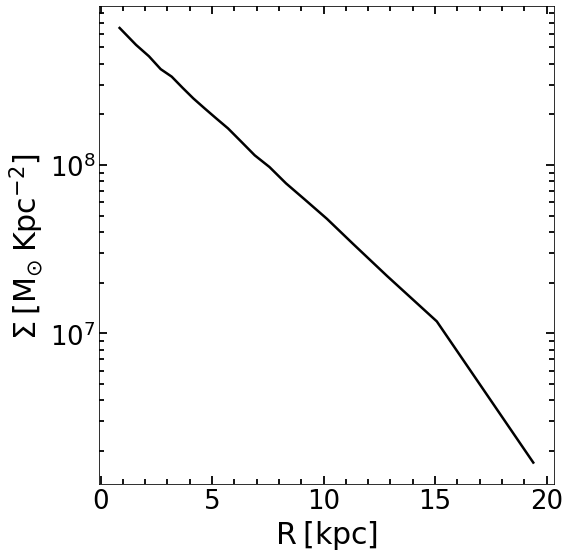

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

ax.plot(rbin, surden,'-', lw=2.5, color='k')

ax.set_yscale('log')
ax.set_ylabel(r'$\Sigma \: \mathrm{[M_{\odot}\:Kpc^{-2}]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{R\:[kpc]}$',fontsize=30)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xlim(0,5)
# ax.set_ylim(0,0.7)

ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='true',top='true')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='true',top='true')
ax.legend(fontsize=21,frameon=False, loc=1)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sigma_R.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def tommre(R, Vcirc, sigma_R, surf_den, G = 4.299e-6):
    
    a0 = (Vcirc/R)**2
    dV = np.diff(Vcirc)
    dR = np.diff(R)
    
    Rmed  = R[:-1] + dR
    deriv = np.interp(R,Rmed,dV/dR)
    
#     plt.plot(Rmed,dV/dR, '-')
#     plt.plot(R,deriv,'-')
    
    k = 2.*a0*(1. + (R/Vcirc) *deriv )
    
#     print k
    Q = sigma_R*np.sqrt(k)/(3.36*G*surf_den)
    
    return Q, np.sqrt(k)

In [30]:
Q = tommre(rbin, Vcirc,sigmaR,surden)

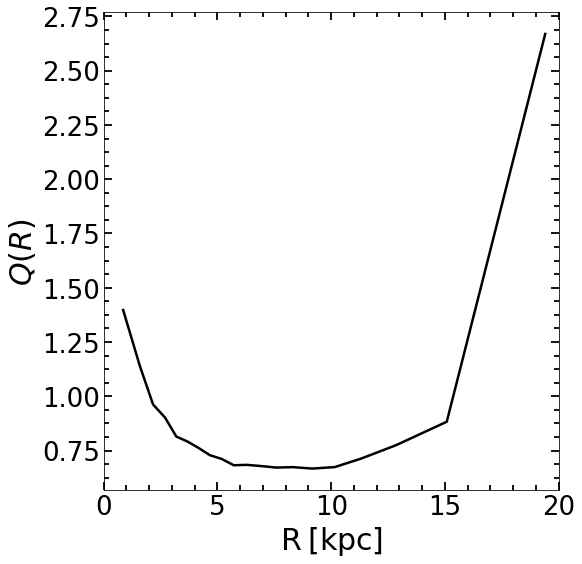

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

ax.plot(rbin, Q[0],'-', lw=2.5, color='k')

# ax.set_yscale('log')
ax.set_ylabel(r'$Q(R)$', fontsize=30)
ax.set_xlabel(r'$\mathrm{R\:[kpc]}$',fontsize=30)
# ax.set_xticks([0,1,2,3,4,5])
ax.set_xlim(0,20)
# ax.set_ylim(0,5)


ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax.legend(fontsize=21,frameon=False, loc=2)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sigma_R.pdf', dpi = 100, xxbox_inches='tight')

plt.show()